In [2]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[] 
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back):]
        dataX.append(a)
        dataY.append(dataset[i:(i + look_back):])
    
    dataX=np.squeeze(dataX,axis=1) #차원 축소
    dataY=np.squeeze(dataY,axis=1) #차원 축소
    return np.array(dataX), np.array(dataY)

In [4]:
np.random.seed(7) #결과를 재현할 수 있도록 난수 시드 수정
data1=pd.read_excel('x_data.xls') #x좌표 엑셀 데이터 불러옴 
data2=pd.read_excel('y_data.xls') #x좌표 엑셀 데이터 불러옴 
data3=pd.read_excel('speed.xls') #x좌표 엑셀 데이터 불러옴 

pddata1=pd.DataFrame(data1) 
pddata1.head()
pddata2=pd.DataFrame(data2) 
pddata2.head()
pddata3=pd.DataFrame(data3) 
pddata3.head()

hap=[] #진짜 합
for j in range(len(pddata1)):
    x_data=np.array(pddata1.loc[j])
    y_data=np.array(pddata2.loc[j])
    s_data=np.array(pddata3.loc[j])

    hap1=[] #[x,y,속력] 데이터를 저장하고 있는 리스트

    for i in range(len(s_data)): 
        sum=[] #리스트 하나당 임시로 x,y,속력을 저장할 리스트 (for문 돌릴때마다 초기화)
        sum.append(x_data[i]) #x넣음
        sum.append(y_data[i]) #y넣음
        sum.append(s_data[i]) #속력넣음
        hap1.append(sum) #[x,y,속력] 하나의 리스트를 hap리스트에 넣음  

    j = j + 1
    
    hap.append(hap1)

n1 = np.array(hap)
print(n1.shape) #257,99,3 257개의 샘플과 99개 시계열, 3개 피쳐(x,y,속력)

(1035, 99, 3)


In [5]:
num_sample = n1.shape[0] # 257개 샘플 데이터
num_sequence = n1.shape[1] # 99개 시계열 데이터
num_feature = n1.shape[2] #3개 피쳐

dataset = n1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #클래스의 인스턴스 생성


#시계열 선회하면서 피팅함
#for ss in range(num_sequence):
#    scaler.partial_fit(n1[:,ss,:])
    
#Numpy 활용하여 3차원 데이터 스케일링(변환) 0~1 스케일링
#results=[]
#for ss in range(num_sequence):
#    results.append(scaler.transform(n1[:,ss,:]).reshape(num_sample,1,num_feature))
#n1_scaled = np.concatenate(results, axis=1)

#dataset=  n1_scaled

In [6]:
train_size = int(len(dataset) * 0.7) #학습 데이터 67%
test_size = len(dataset) - train_size #테스트 데이터 33%
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# look_back = 1 #이전 시간 단계 입력변수
# #X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# LSTM 모델은 입력데이터 X에 [samples, time steps, features]형식으로 넣어야함
# 현재 데이터는 [samples, features]이므로, numpy.reshape()를 사용하여
#준비된 train과 test 입력 데이터를 3차원으로 바꿈
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# # dataframe=pd.DataFrame(hap)
# dataframe=pd.DataFrame(data1) #DataFrame은 2차원 테이블 데이터 구조 자료형

# dataset = dataframe.values #데이터 프레임에서 numpy배열 추출

# dataset = dataset.astype('float32') #정수값을 부동 소수점 값으로 변환
# # LSTM 은 S자형(기본값) 또는 tanh활성화 기능을 사용할 떄 입력 데이터의 스케일에 민감
# scaler = MinMaxScaler(feature_range=(0, 1)) #정규화함 (0에서 1까지의 범위로 데이터 크기 조정)
# dataset = scaler.fit_transform(dataset.reshape(-1,1))
#reshape함수를 사용하여 1차원 데이터를 2차원으로 변경

# dataset=  n1_scaled

# train_size = int(len(dataset) * 0.77) #학습 데이터 7%
# test_size = len(dataset) - train_size #테스트 데이터 33%
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#두개의 인수, 데이터 세트로 변환하려는 Numpt 배열인 dataset과 다음 시간을 예측하기
#위해 입력 변수로 사용할 이전 시간 단계 수인 look_back을 사용. 기본값을 1

# look_back = 1 #이전 시간 단계 입력변수
# #X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # LSTM 모델은 입력데이터 X에 [samples, time steps, features]형식으로 넣어야함
# # 현재 데이터는 [samples, features]이므로, numpy.reshape()를 사용하여
# #준비된 train과 test 입력 데이터를 3차원으로 바꿈
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [7]:
np.shape(train)
np.shape(test)

len(dataset)

1035

In [8]:
#두개의 인수, 데이터 세트로 변환하려는 Numpy 배열인 dataset과 다음 시간을 예측하기
#위해 입력 변수로 사용할 이전 시간 단계 수인 look_back을 사용. 기본값을 1
#reshpae()함수를 사용하여 배열의 차원을 변경할 수 있음

look_back = 1 #이전 시간 단계 입력변수
#X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# LSTM 모델은 입력데이터 X에 [samples, time steps, features]형식으로 넣어야함
# 현재 데이터는 [samples, features]이므로, numpy.reshape()를 사용하여
#준비된 train과 test 입력 데이터를 3차원으로 바꿈
# trainX = np.reshape(trainX.shape[0], trainX.shape[1], trainX.shape[2])
# testX = np.reshape(testX.shape[0], testX.shape[1], testX.shape[2])

In [10]:
#LSTM 모델 생성

from keras.layers import TimeDistributed
from keras.layers import InputLayer
from keras.layers import Reshape

model = Sequential() # Sequeatial Model 

model.add(LSTM(64,return_sequences=True, input_shape=(num_sequence,num_feature)))  
model.add(Dense(3, activation='softmax')) # 3개의 예측
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history=model.fit(trainX, trainY, epochs=500, batch_size=20, validation_split=0.2, verbose=1,callbacks=[early_stopping])

model.summary()

Train on 577 samples, validate on 145 samples
Epoch 1/500
577/577 [==============================] - 3s 5ms/step - loss: 558.3404 - accuracy: 0.7978 - val_loss: 471.7969 - val_accuracy: 0.9113
Epoch 2/500
577/577 [==============================] - 2s 3ms/step - loss: 486.2100 - accuracy: 0.9466 - val_loss: 456.5304 - val_accuracy: 0.9346
Epoch 3/500
577/577 [==============================] - 2s 3ms/step - loss: 478.3156 - accuracy: 0.9627 - val_loss: 453.4215 - val_accuracy: 0.9665
Epoch 4/500
577/577 [==============================] - 2s 3ms/step - loss: 476.4918 - accuracy: 0.9624 - val_loss: 452.3274 - val_accuracy: 0.9710
Epoch 5/500
577/577 [==============================] - 2s 3ms/step - loss: 475.7372 - accuracy: 0.9824 - val_loss: 451.8599 - val_accuracy: 0.9819
Epoch 6/500
577/577 [==============================] - 2s 4ms/step - loss: 475.4693 - accuracy: 0.9836 - val_loss: 451.6374 - val_accuracy: 0.9842
Epoch 7/500
577/577 [==============================] - 2s 3ms/step - los

In [11]:
print("정확도: ",(model.evaluate(testX, testY)))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print('y: ',trainY)
print('predict: ',testPredict)

309/309 [==============================] - 0s 1ms/step
정확도:  [468.6886153236562, 0.9901278018951416]
y:  [[[184.         323.           0.        ]
  [184.         323.           0.        ]
  [184.         323.           0.        ]
  ...
  [391.         190.           0.        ]
  [391.         190.           0.        ]
  [391.         190.           0.        ]]

 [[325.         222.           0.        ]
  [325.         222.           0.        ]
  [325.         222.           0.        ]
  ...
  [252.         346.           6.40312424]
  [248.         351.           0.        ]
  [248.         351.           0.        ]]

 [[141.         525.           0.        ]
  [141.         525.           0.        ]
  [141.         525.           0.        ]
  ...
  [277.         421.           5.        ]
  [281.         418.           0.        ]
  [281.         418.           3.60555128]]

 ...

 [[467.         280.           0.        ]
  [467.         280.           0.        ]
  [46

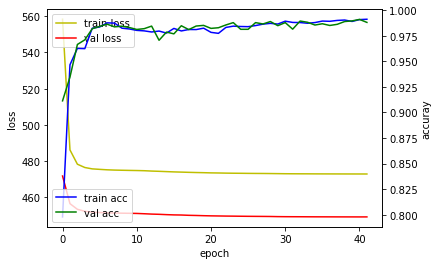

In [18]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [17]:
#trainY -> (x,y)
Yx_train_plt=((x_data) * 0.70)
Yx_train_plt=np.array(Yx_train_plt)

Yy_train_plt=((y_data) * 0.70)
Yy_train_plt=np.array(Yy_train_plt)

#testX -> (x,y)
print(testPredict.shape)

Xx_test_plt=[]
Xy_test_plt=[]

for i in range(309):
    for j in range(99):
        Xx_test_plt.append(testPredict[i,j,0])
        Xy_test_plt.append(testPredict[i,j,1])
        
        j = j + 1
    i = i + 1


(309, 99, 3)


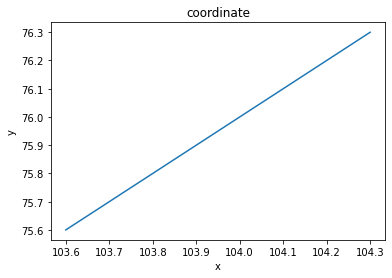

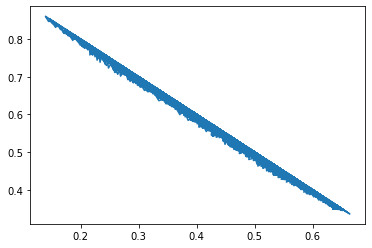

In [18]:
plt.title('coordinate')
plt.ylabel('y')
plt.xlabel('x')

plt.plot(Yx_train_plt,Yy_train_plt) #trainY -> (x,y) , blue
plt.show()

plt.plot(Xx_test_plt,Xy_test_plt) #testX -> (x,y)
plt.show()